O grupo( max 2 alunos) irá avaliar o avanço e o resultado do próprio projeto e vai dar uma nota baseada na rubrica abaixo e informar as funcionalidades que conseguiu implementar. Cuidado com a desonestidade intelectual. Uma auto avaliação não compatível com o material entregue será interpretada como desonestidade intelectual. Grave um vídeo de demonstração das funcionalidades implementadas.

R1
 - NOTA 6: Segmenta ou filtra os círculos maiores da imagem baseado em cores ou canais da imagem ou por exemplos com contornos e produz output visual. Exibe a área e o centro de massa da imagem. Use circulo.png. Essa rubrica pode ser feito no jupyter notebook ou google Colab.

R2
 - NOTA 8: Faz o R1, Detecta o contorno dos círculos com a transformada de hough, traça uma reta entre os dois centros dos círculos e calcula o ângulo de inclinação da reta em relação o plano horizontal e exibe esse resultado. Essa rubrica pode ser feito jupyter notebook ou google Colab.

R3
 - NOTA 10: Faz o R2, realiza o processamento com imagens da webcam (executa um programa .py) e controla um jogo, emulando o pressionamento das teclas em função do ângulo de inclinação (ângulo positivo vira para direita, ângulo negativo vira para esquerda se for um jogo de corrida). 


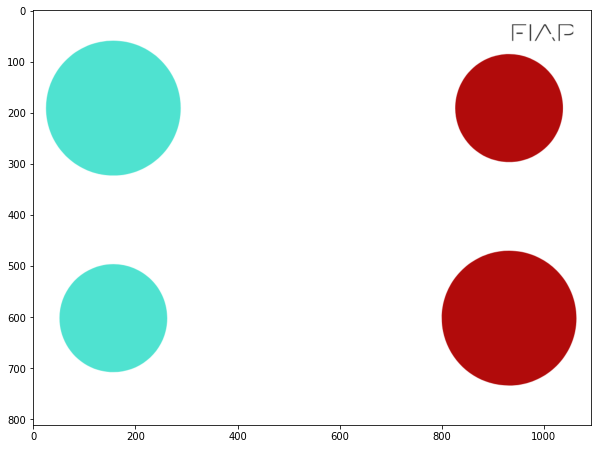

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulos.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

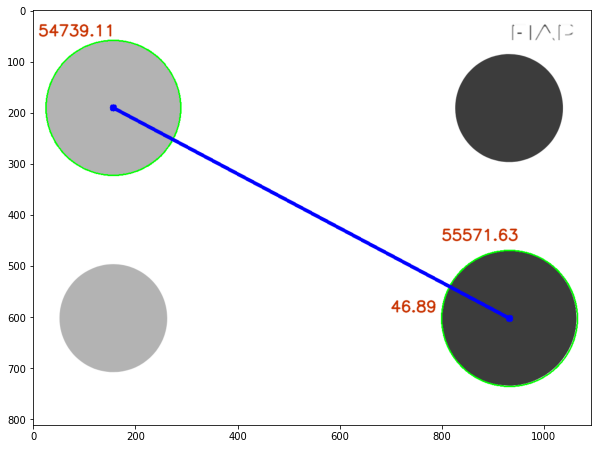

In [2]:
import cv2
import numpy as np
import math

img = cv2.imread('circulos.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

# https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=2,minDist=40,param1=200,param2=100,minRadius=120,maxRadius=0)

circles = np.uint16(np.around(circles))
for (x, y, r) in circles[0,:]:
    cv2.circle(cimg,(x,y),r,(0,255,0),2)
    # desenha no centro do circulo
    cv2.circle(cimg,(x,y),2,(0,0,255),10)

#Area do circulo 1
text = math.pi * pow(circles[0,0,2],2)
text = round(text,2)
cv2.putText(cimg, str(text), (10,50), cv2.FONT_HERSHEY_SIMPLEX,1,(200,50,0),2,cv2.LINE_AA)

#Area do circulo 2
text = math.pi * pow(circles[0,1,2],2)
text = round(text,2)
cv2.putText(cimg, str(text), (800,450), cv2.FONT_HERSHEY_SIMPLEX,1,(200,50,0),2,cv2.LINE_AA)
#print(circles)

#Reta entre os dois centros dos círculos 
cv2.line(cimg,(circles[0,0,0],circles[0,0,1]),(x,y),(0,0,255),5)
#Linhas guia
#cv2.line(cimg,(157,191),(933,191),(0,0,255),5)
#cv2.line(cimg,(157,603),(933,603),(0,0,255),5)

#teorema de Pitágoras
#hipotenusa**2 = cateto oposto**2 + cateto adjacente**2
oposto = 603-191
adjacente = 933-157
hipotenusa = ((oposto)**2) + ((adjacente)**2)
hipotenusa = pow(hipotenusa, 1/2)
#seno
angulo = oposto/hipotenusa
angulo = round((angulo*100),2)
#print angulo
cv2.putText(cimg, str(angulo), (700,590), cv2.FONT_HERSHEY_SIMPLEX,1,(200,50,0),2,cv2.LINE_AA)

plt.figure(figsize = (10,10))   
plt.imshow(cimg)